# EDA With Time Series

**Importing Pandas Datareader**

In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

**Importing TESLA Stock Data**

In [2]:
df_tesla = pdr.get_data_yahoo('TSLA')

In [3]:
df_tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-17,918.500000,874.099976,913.260010,876.349976,18392800.0,876.349976
2022-02-18,886.869995,837.609985,886.000000,856.979980,22710500.0,856.979980
2022-02-22,856.729980,801.099976,834.130005,821.530029,27762700.0,821.530029
2022-02-23,835.299988,760.559998,830.429993,764.039978,31752300.0,764.039978
2022-02-24,802.479980,700.000000,700.390015,800.770020,44876700.0,800.770020


<AxesSubplot:xlabel='Date'>

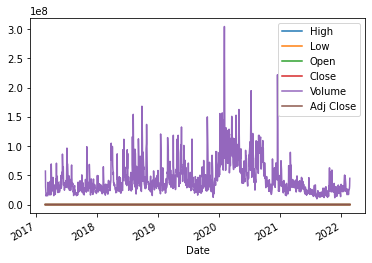

In [4]:
df_tesla.plot()
#we will not Use this

**Plotting High Prices**

<AxesSubplot:xlabel='Date'>

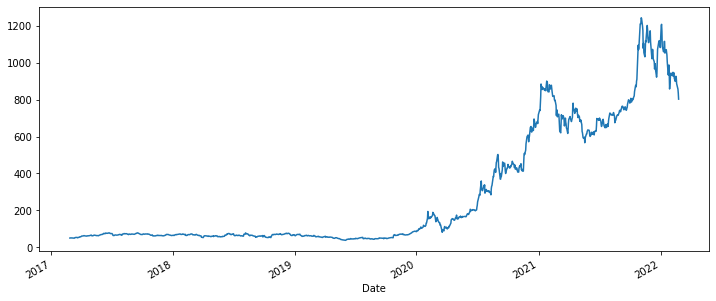

In [5]:
df_tesla['High'].plot(figsize=(12,5))

**Providing X limits and Y limits**

We will also Apply Coloring and Line Style (ls)

<AxesSubplot:xlabel='Date'>

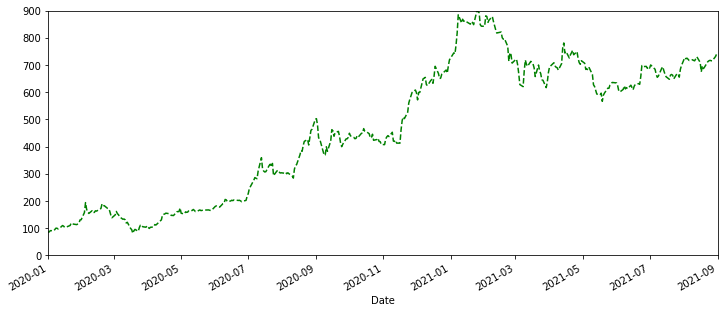

In [6]:
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,900],figsize=(12,5),color ='g',ls='--')

**Slicing the data based on Dates**

In [7]:
df_tesla.index[0:4]

DatetimeIndex(['2017-02-27', '2017-02-28', '2017-03-01', '2017-03-02'], dtype='datetime64[ns]', name='Date', freq=None)

In [8]:
index = df_tesla.loc['2020-01-01':'2021-09-01'].index

share_open = df_tesla.loc['2020-01-01':'2021-09-01']['Open']

In [9]:
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=421, freq=None)

In [10]:
share_open

Date
2020-01-02     84.900002
2020-01-03     88.099998
2020-01-06     88.094002
2020-01-07     92.279999
2020-01-08     94.739998
                 ...    
2021-08-26    708.309998
2021-08-27    705.000000
2021-08-30    714.719971
2021-08-31    733.000000
2021-09-01    734.080017
Name: Open, Length: 421, dtype: float64

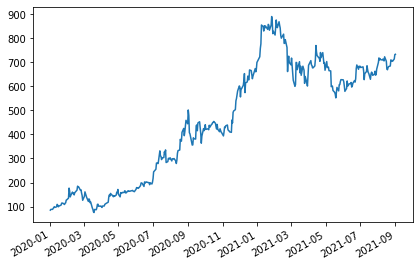

In [11]:
figure,axis = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate() # this function is preventing Overlapping 
axis.plot(index,share_open)


## Datetime Index

In [12]:
df_tesla = df_tesla.reset_index()

In [13]:
df_tesla.head(3)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998
1,2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2,2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002


In [14]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   High       1259 non-null   float64       
 2   Low        1259 non-null   float64       
 3   Open       1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Volume     1259 non-null   float64       
 6   Adj Close  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 69.0 KB


If you have date column in object format we have to change it to datetime.

using pd.to_datetime(Date Column name)

In [15]:
# For reverting set index use df.set_index('Date', drop=True)

In [16]:
df_tesla = df_tesla.set_index('Date',drop=True)

In [17]:
df_tesla.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999


In [18]:
datetime.now()

datetime.datetime(2022, 2, 25, 20, 2, 54, 942361)

## Time Resampling

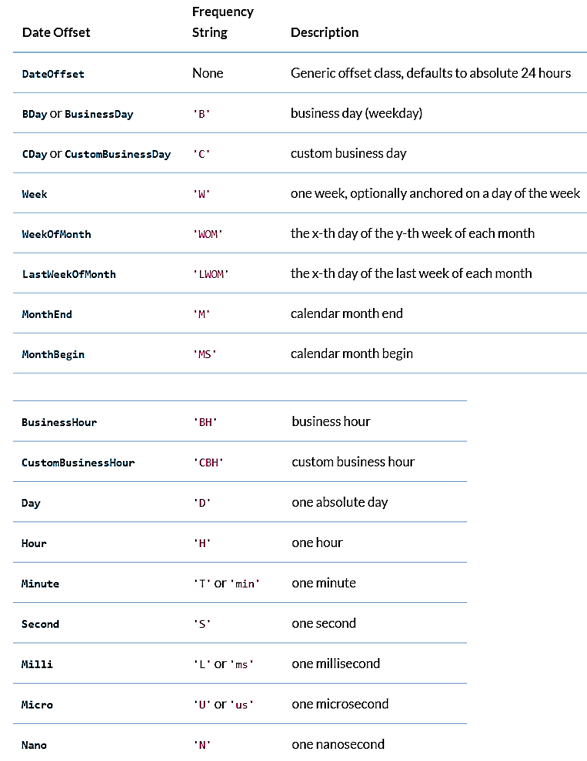

In [19]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999


In [20]:
df_tesla.resample(rule ='A').min() #giving us the minimum values of each year

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,49.299999,48.402000,48.838001,48.737999,14597000.0,48.737999
2018-12-31,52.066002,48.917999,50.556000,50.112000,15403500.0,50.112000
2019-12-31,37.335999,35.397999,36.220001,35.793999,12328000.0,35.793999
2020-12-31,80.972000,70.101997,74.940002,72.244003,17357700.0,72.244003
2021-12-31,566.210022,539.489990,552.549988,563.000000,9800600.0,563.000000
2022-12-31,802.479980,700.000000,700.390015,764.039978,16909700.0,764.039978


In [21]:
df_tesla.resample(rule ='A').max() #Rule A is Year End Frequency

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,77.921997,75.870003,77.337997,77.000000,98957000.0,77.000000
2018-12-31,77.491997,73.424004,75.000000,75.914001,168248500.0,75.914001
2019-12-31,87.061996,85.269997,87.000000,86.188004,150030500.0,86.188004
2020-12-31,718.719971,691.119995,699.989990,705.669983,304694000.0,705.669983
2021-12-31,1243.489990,1217.000000,1234.410034,1229.910034,89396500.0,1229.910034
2022-12-31,1208.000000,1136.040039,1189.550049,1199.780029,50521900.0,1199.780029


Text(0.5, 1.0, 'Max Prices Each year(2017-2022)')

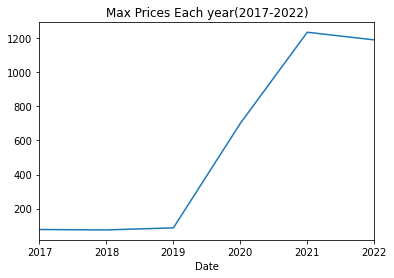

In [22]:
df_tesla.resample(rule ='A').max()['Open'].plot()
plt.title('Max Prices Each year(2017-2022)')

**For Quarterly Start Frequency**

Text(0.5, 1.0, 'Max Open Prices Quarterly(2017-2022)')

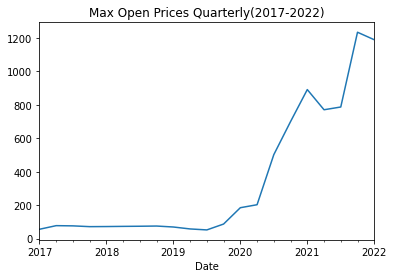

In [23]:
df_tesla.resample(rule ='QS').max()['Open'].plot()
plt.title('Max Open Prices Quarterly(2017-2022)')

<AxesSubplot:xlabel='Date'>

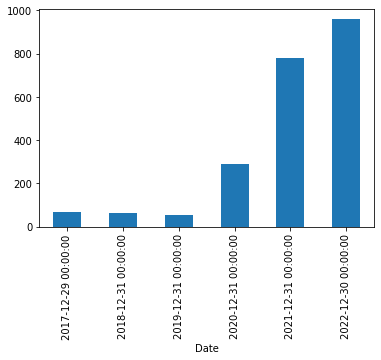

In [24]:
#plotting
df_tesla['Open'].resample(rule = 'BA').mean().plot(kind = 'bar')

### Three main KEYWORDS

In [25]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999


In [26]:
df_tesla['High'].head()

Date
2017-02-27    49.672001
2017-02-28    50.200001
2017-03-01    50.970001
2017-03-02    50.655998
2017-03-03    50.380001
Name: High, dtype: float64

**1. Rolling**

In [27]:
df_tesla['High'].rolling(11).mean().head(20)

Date
2017-02-27          NaN
2017-02-28          NaN
2017-03-01          NaN
2017-03-02          NaN
2017-03-03          NaN
2017-03-06          NaN
2017-03-07          NaN
2017-03-08          NaN
2017-03-09          NaN
2017-03-10          NaN
2017-03-13    50.128364
2017-03-14    50.305818
2017-03-15    50.487636
2017-03-16    50.685818
2017-03-17    50.904909
2017-03-20    51.134909
2017-03-21    51.373091
2017-03-22    51.394545
2017-03-23    51.532727
2017-03-24    51.809637
Name: High, dtype: float64

In [28]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999


In [29]:
df_tesla['Open: 30 Days Rolling'] = df_tesla['Open'].rolling(30).mean()

In [31]:
df_tesla.head(31)

,High,Low,Open,Close,Volume,Adj Close,Open: 30 Days Rolling
Date,,,,,,,
2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998,NaN
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001,NaN
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002,NaN
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001,NaN
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999,NaN
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001,NaN
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999,NaN
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001,NaN
2017-03-09,49.731998,48.599998,49.526001,48.980000,19396500.0,48.980000,NaN


<AxesSubplot:xlabel='Date'>

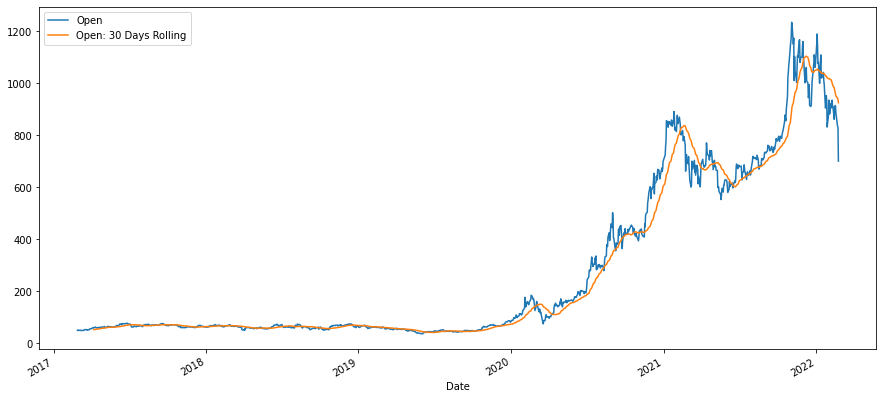

In [34]:
df_tesla[['Open','Open: 30 Days Rolling']].plot(figsize = (15,7)) #the orange line is the smothen version of blue zigzag line

In [35]:
#Task 1 : Read the Microsoft Data using Datareader
#Task 2 : Get the maximum Price of the share from 2017 to 2022
#Task 3 : Which is the date of the heighest price of the stock ?
#Task 4 : Which is the date of the lowest price of the stock ?

In [36]:
df_micro = pdr.get_data_yahoo('MSFT')

In [37]:
df_micro.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-27,64.540001,64.050003,64.540001,64.230003,15871500.0,59.957726
2017-02-28,64.199997,63.759998,64.080002,63.980000,23239800.0,59.724354
2017-03-01,64.989998,64.019997,64.129997,64.940002,26937500.0,60.620514
2017-03-02,64.750000,63.880001,64.690002,64.010002,24539600.0,59.752357
2017-03-03,64.279999,63.619999,63.990002,64.250000,18135900.0,59.976406


In [41]:
df_micro['High'].resample(rule='A').max()

Date
2017-12-31     87.500000
2018-12-31    116.180000
2019-12-31    159.550003
2020-12-31    232.860001
2021-12-31    349.670013
2022-12-31    338.000000
Freq: A-DEC, Name: High, dtype: float64

In [49]:
lowest = df_micro['Close'].min()
heighest = df_micro['Close'].max()

In [50]:
lowest,heighest

(63.97999954223633, 343.1099853515625)

In [51]:
df_micro[df_micro['Close'] == lowest]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-28,64.199997,63.759998,64.080002,63.98,23239800.0,59.724354


In [52]:
df_micro[df_micro['Close'] == heighest]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-11-19,345.100006,342.200012,342.640015,343.109985,21963400.0,342.402008


**Task Completed !!**